In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

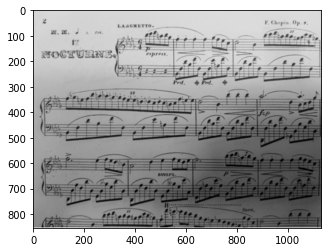

In [7]:
img = cv2.imread("Piano_Sheet_Music.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

Text(0.5, 1.0, 'adp')

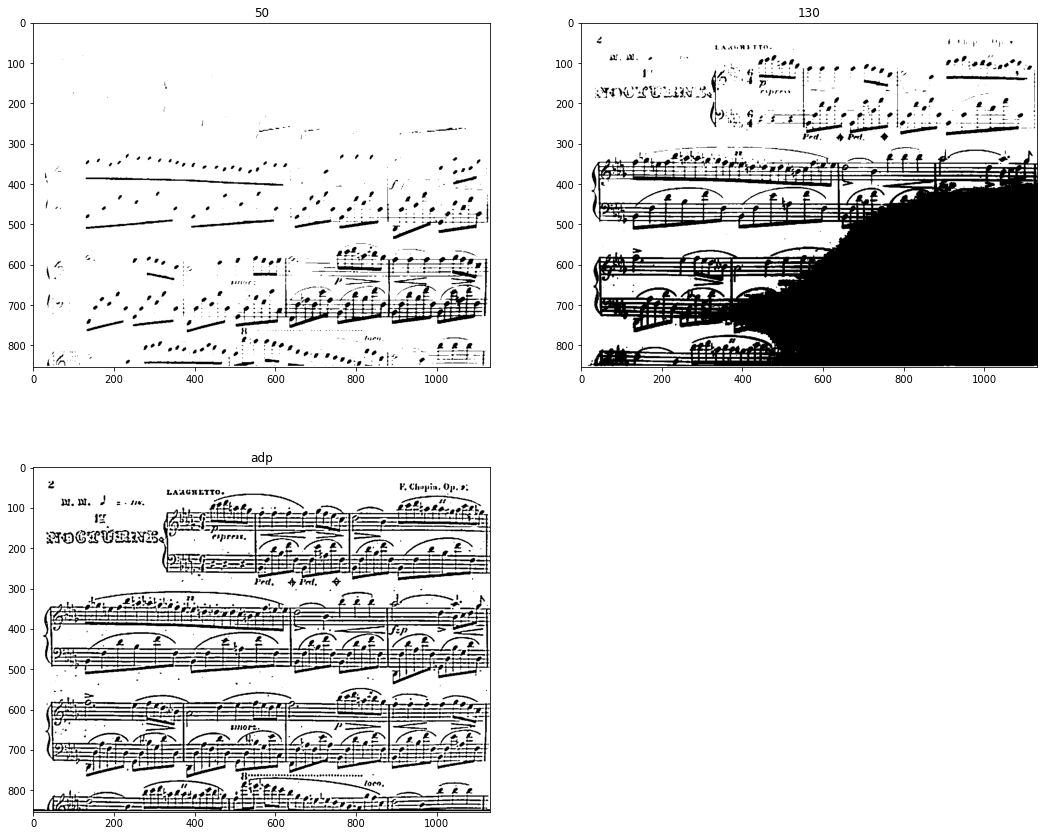

In [12]:
retval, img_50 = cv2.threshold(img, 50, 255, cv2.THRESH_BINARY)
retval, img_130 = cv2.threshold(img, 130, 255, cv2.THRESH_BINARY)
img_adp = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 7)
# plt.imshow(img_50);
plt.figure(figsize=(18, 15))
plt.subplot(221);plt.imshow(img_50, cmap='gray');plt.title('50')
plt.subplot(222);plt.imshow(img_130, cmap='gray');plt.title('130')
plt.subplot(223);plt.imshow(img_adp, cmap='gray');plt.title('adp')
                                                        

# Ok, let now try to merge two image.

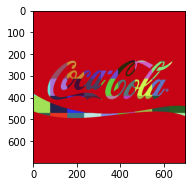

In [63]:
img_cc = cv2.imread('coca-cola-logo.png')
img_cb = cv2.imread('checkerboard_color.png')

img_cb = cv2.resize(img_cb, img_cc.shape[0: 2], cv2.INTER_LINEAR)

img_cc_gray = cv2.cvtColor(img_cc, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img_cc_gray, 100, 255, cv2.THRESH_BINARY)

img_fg = cv2.bitwise_and(img_cb, img_cb, mask=mask)
# plt.imshow(img_fg)

img_bg = cv2.bitwise_and(img_cc, img_cc, mask=~mask)
# plt.subplot(121);plt.imshow(img_bg[:,:,::-1])

img = cv2.bitwise_or(img_bg, img_fg)
plt.subplot(122);plt.imshow(img[:,:,::-1])